<a href="https://colab.research.google.com/github/yeesem2002/Machine-Learning-Project/blob/main/Wine%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
urlRed = "https://raw.githubusercontent.com/yeesem2002/Machine-Learning/main/winequality-red.csv"
urlWhite = "https://raw.githubusercontent.com/yeesem2002/Machine-Learning/main/winequality-white.csv"

In [ ]:
#red = pd.read_csv('/content/winequality-red.csv',sep = ';', names=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])
#white = pd.read_csv('/content/winequality-white.csv',sep = ';',names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])

red = pd.read_csv(urlRed,encoding='unicode_escape',sep = ';', names=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])
white = pd.read_csv(urlWhite,encoding='unicode_escape',sep = ';', names=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])

In [ ]:
red = red.iloc[1:].reset_index().iloc[:,1:]
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [ ]:
white = white.iloc[1:].reset_index().iloc[:,1:]
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   object 
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   object 
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(11), object(1)
memory usage: 459.3+ KB


# **Clean Red Wine Quality Data**

In [ ]:
#Original data
#sns.pairplot(red)
#plt.show()

In [ ]:
red["fixed acidity"] = red["fixed acidity"].astype(float)

In [ ]:
red_duplicated = red.duplicated()
count_red_duplicate = red_duplicated.sum()
print(count_red_duplicate)

240


In [ ]:
#Drop the duplicated columns
red.drop_duplicates(inplace=True,keep='first')

In [ ]:
red.duplicated().sum()

0

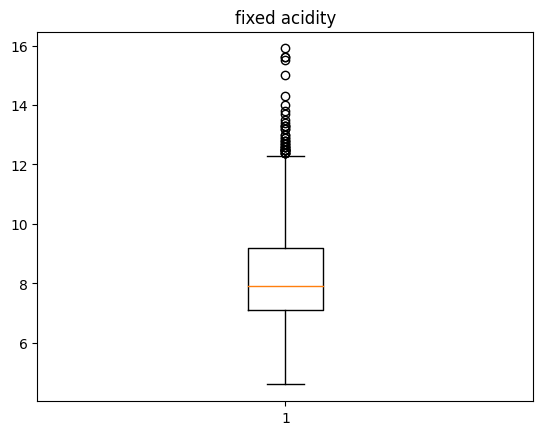

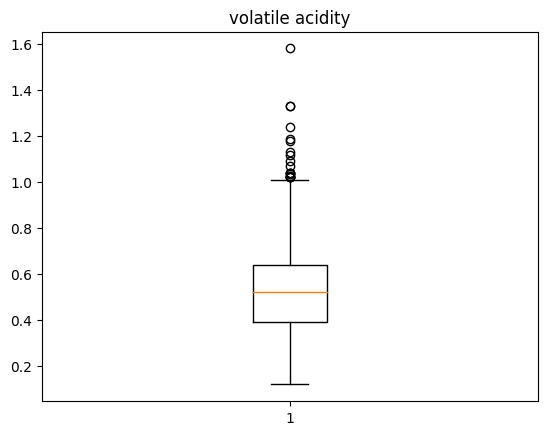

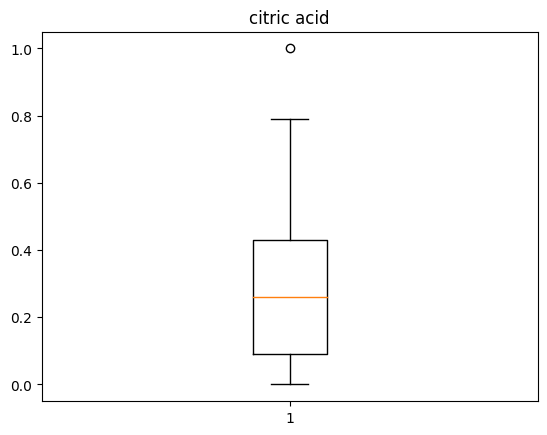

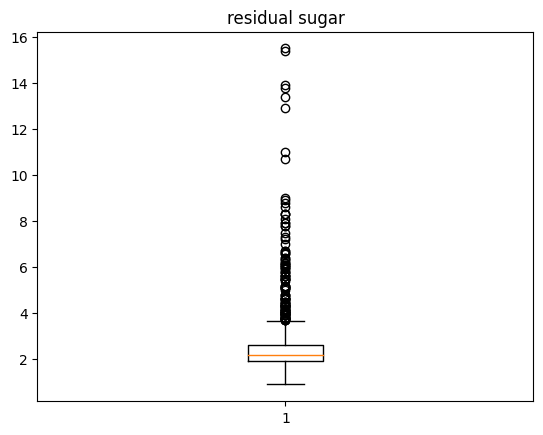

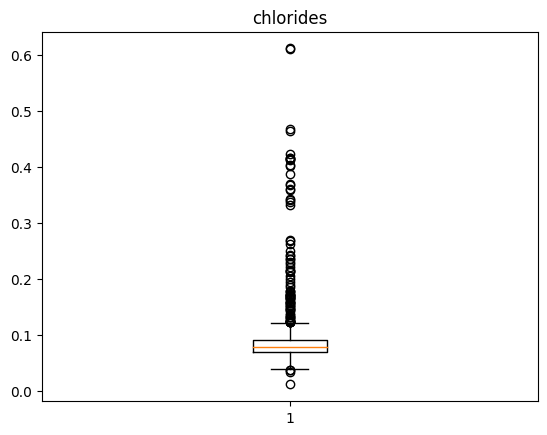

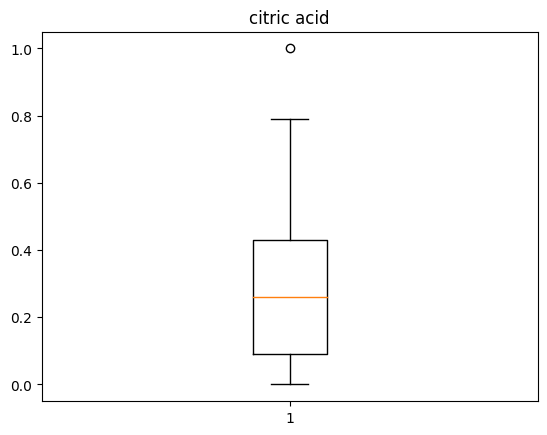

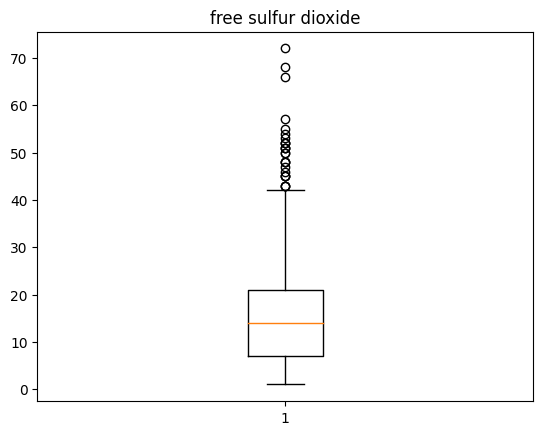

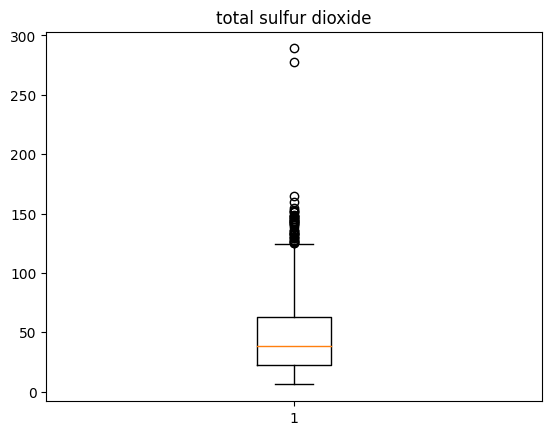

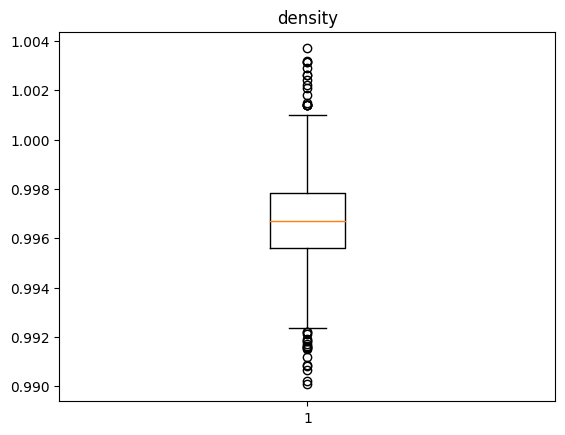

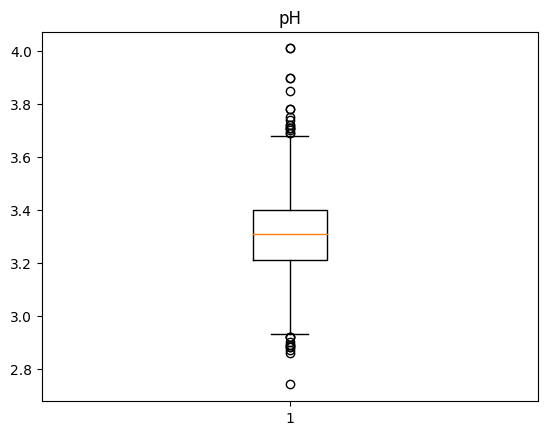

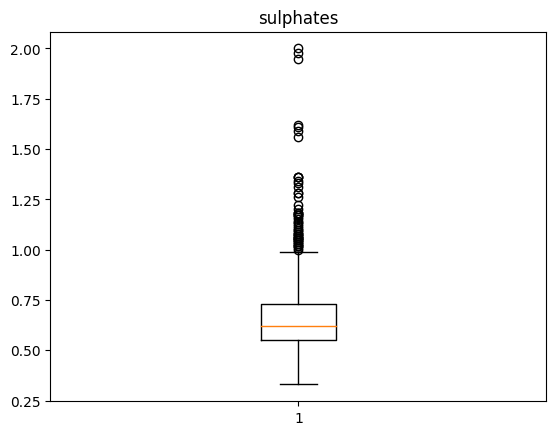

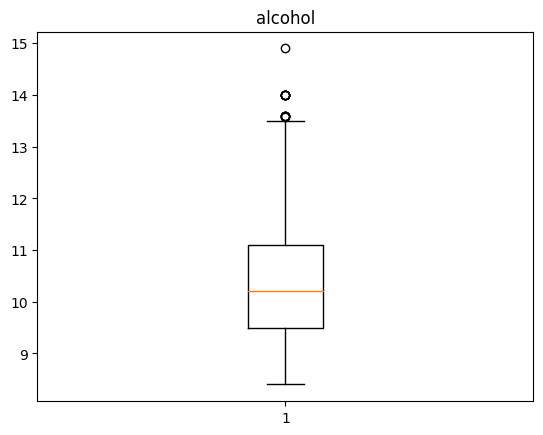

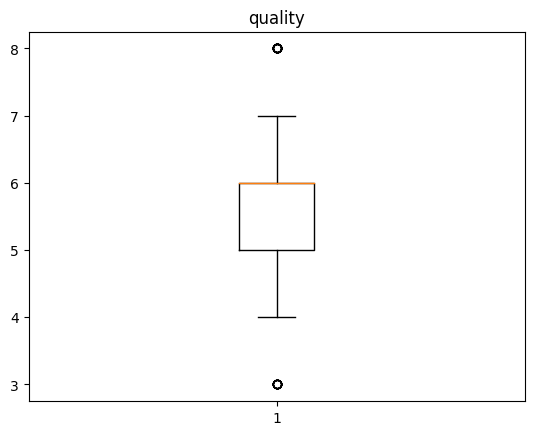

In [ ]:
columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "citric acid",
           "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

for column in columns:
    plt.boxplot(red[column])
    plt.title(column)
    plt.show()

In [ ]:
'''
#Outlier treatment
#columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "citric acid",
#           "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

column_red = red.columns.to_numpy()

for column in column_red:
     Q1 = red[column].quantile(0.25)
     Q3 = red[column].quantile(0.75)
     IQR = Q3 - Q1
     red = red[(red[column]>=Q1-1.5*IQR) & (red[column]<=Q3+1.5*IQR)]

'''

'\n#Outlier treatment \n#columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "citric acid",\n#           "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]\n\ncolumn_red = red.columns.to_numpy()\n\nfor column in column_red:\n     Q1 = red[column].quantile(0.25)\n     Q3 = red[column].quantile(0.75)\n     IQR = Q3 - Q1\n     red = red[(red[column]>=Q1-1.5*IQR) & (red[column]<=Q3+1.5*IQR)]\n\n'

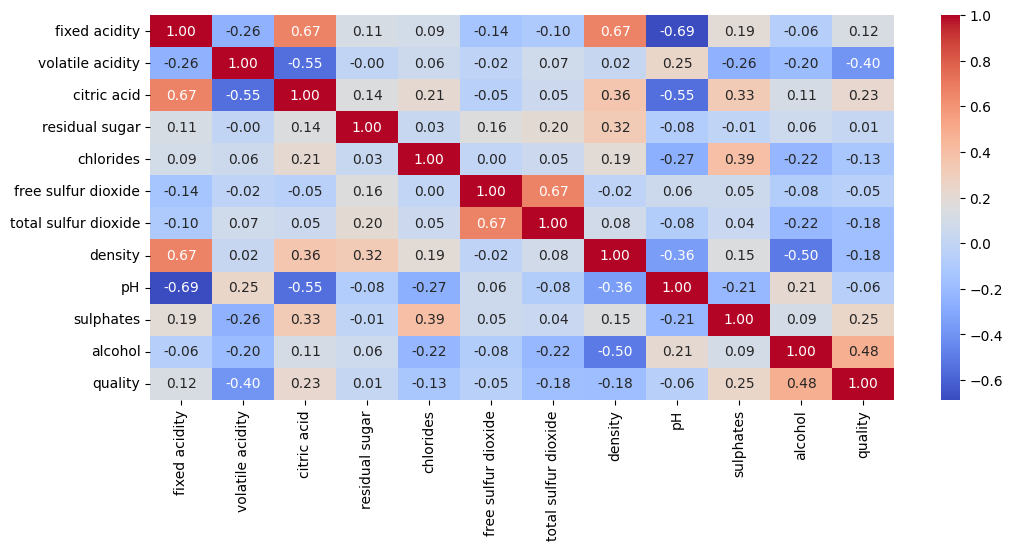

In [ ]:
#Compute correlation matrix
corr_matrix = red.corr()

#Create heatmap
plt.figure(figsize = (12,5))
sns.heatmap(corr_matrix,annot = True,cmap="coolwarm",fmt=".2f")

# Show the half heatmap
plt.show()

In [ ]:
#Cleaned data
#sns.pairplot(red)
#plt.show()

# **Clean White Wine Quality Data**

In [ ]:
white["fixed acidity"] = white["fixed acidity"].astype(float)

In [ ]:
#Original White Wine Quality Data
#sns.pairplot(white)
#plt.show()

In [ ]:
#Get the total number of duplicated data
white_duplicated = white.duplicated()
count_white_duplicate = white_duplicated.sum()
print(count_white_duplicate)

937


In [ ]:
#Drop duplicated data
white.drop_duplicates(inplace=True,keep='first')

In [ ]:
#Get the sum of duplicated data after drop
white.duplicated().sum()

0

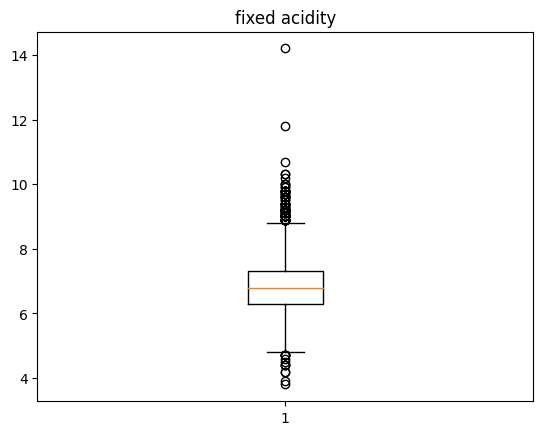

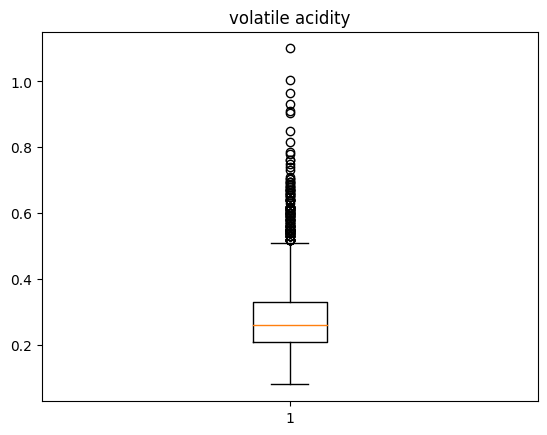

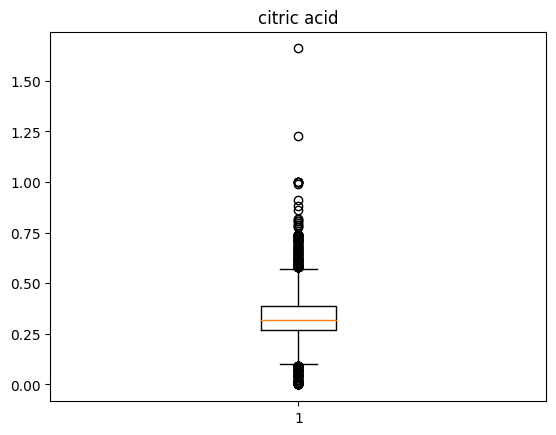

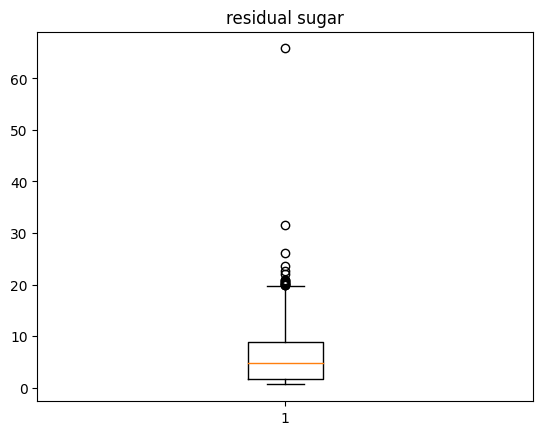

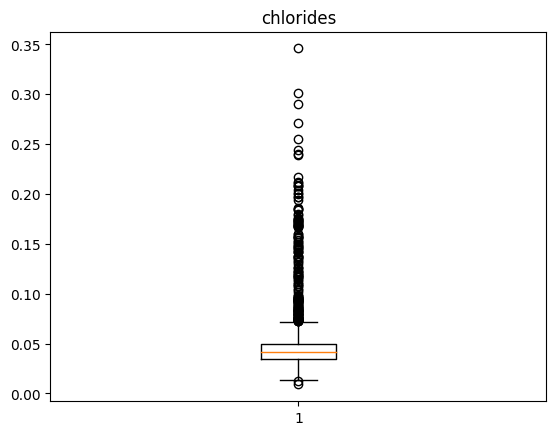

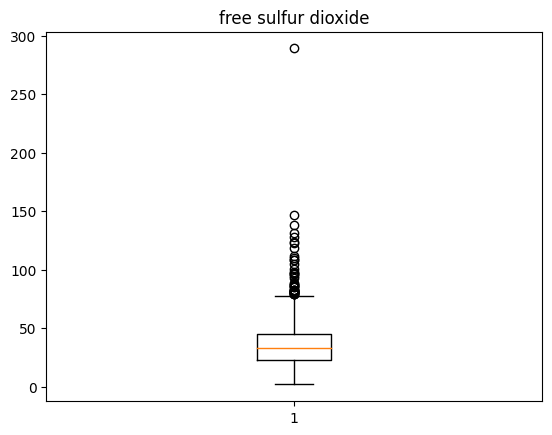

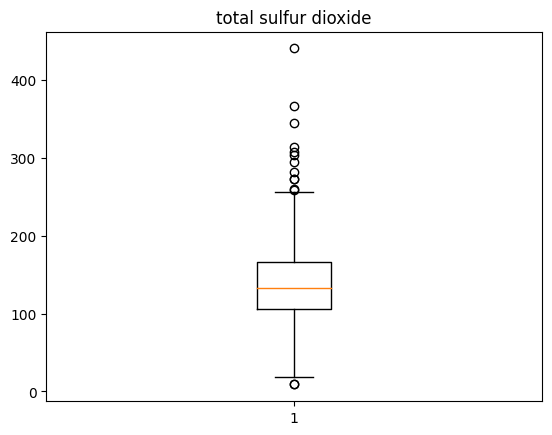

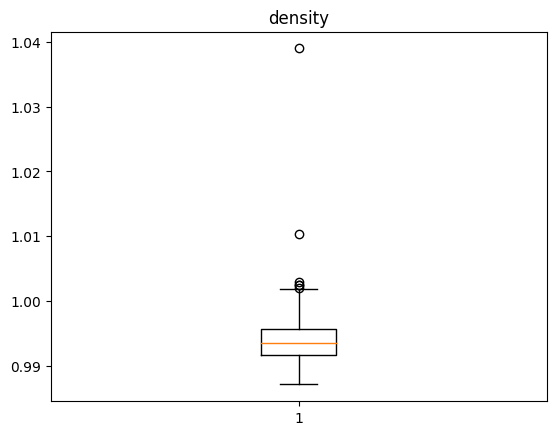

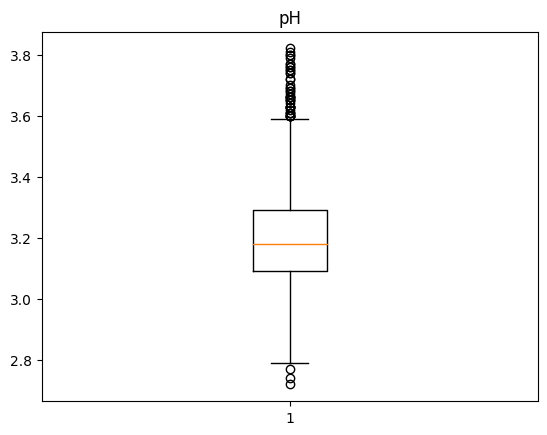

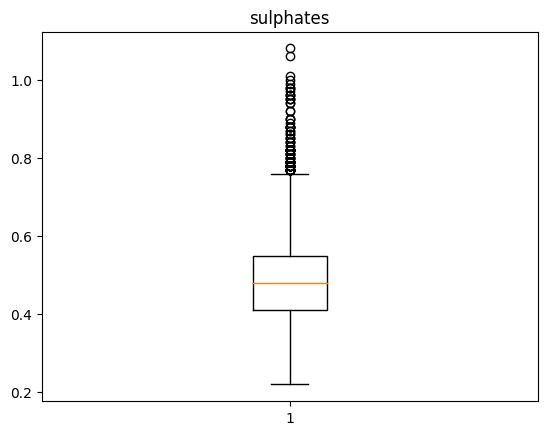

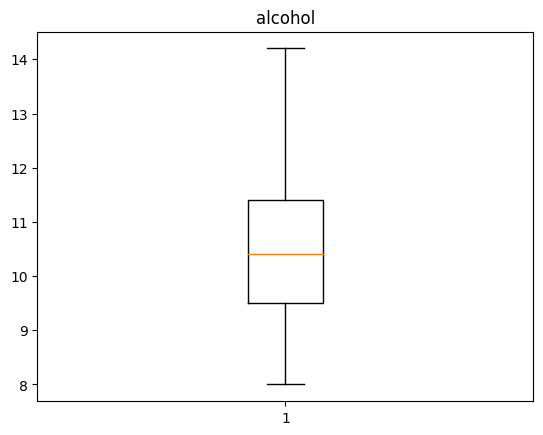

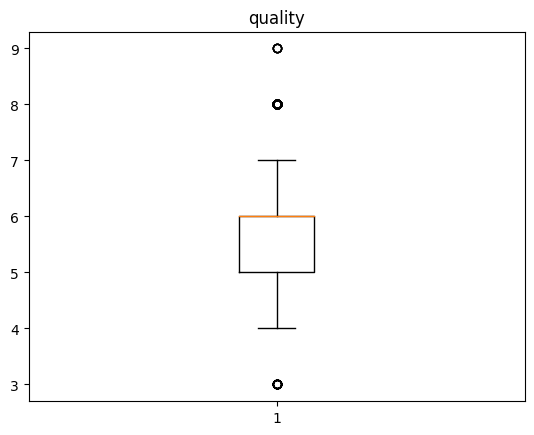

In [ ]:
#Outlier checking
#columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "citric acid",
#           "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

columns = white.columns[0:12]

for column in columns:
    plt.boxplot(white[column])
    plt.title(column)
    plt.show()

In [ ]:
'''
columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "citric acid",
           "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

#column_white = white.columns.to_numpy()

for column in columns:
     Q1 = white[column].quantile(0.25)
     Q3 = white[column].quantile(0.75)
     IQR = Q3 - Q1
     white = white[(white[column]>=Q1-1.5*IQR) & (white[column]<=Q3+1.5*IQR)]
'''

'\ncolumns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "citric acid",\n           "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]\n\n#column_white = white.columns.to_numpy()\n\nfor column in columns:\n     Q1 = white[column].quantile(0.25)\n     Q3 = white[column].quantile(0.75)\n     IQR = Q3 - Q1\n     white = white[(white[column]>=Q1-1.5*IQR) & (white[column]<=Q3+1.5*IQR)]\n'

<Axes: >

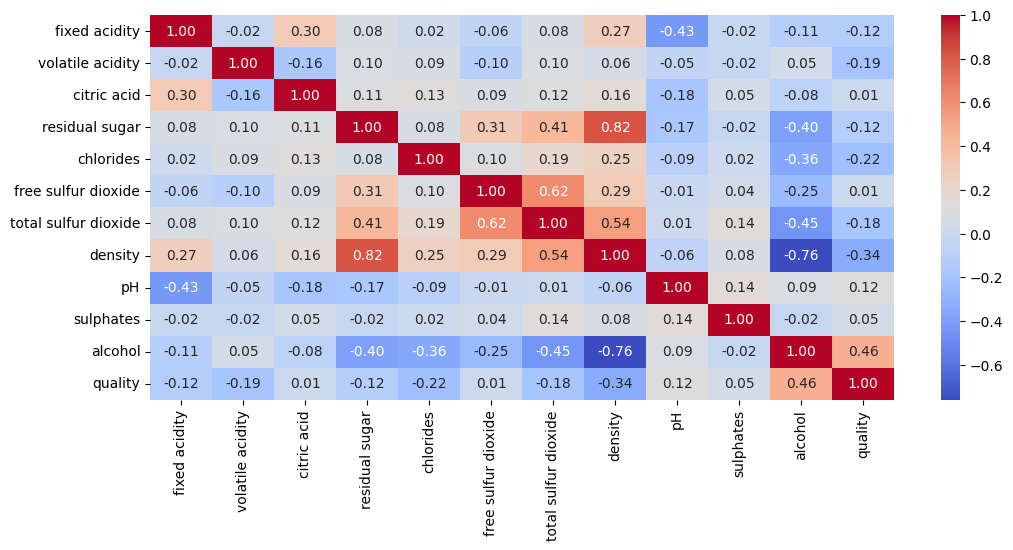

In [ ]:
#Calculate the correlation
corr_matrix = white.corr()

#Display the correlation heatmap
plt.figure(figsize = (12,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f")

In [ ]:
#Cleaned White Quality Wine Data
#sns.pairplot(white)
#plt.show()

In [ ]:
#Combine both the red wine quality data and white wine quality data
#axis = 0 - Combine vertically
#axis = 1 - Combine horizontally

red['type'] = 1
white['type'] = 0
combine_data = pd.concat([red,white],axis=0,ignore_index = True)

combine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,0


# **Data exploratory**

In [ ]:
#normalize = True - is to change into percentage
data = combine_data['type'].value_counts(normalize=True)
data

0    0.744549
1    0.255451
Name: type, dtype: float64

In [ ]:
combine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<Axes: >

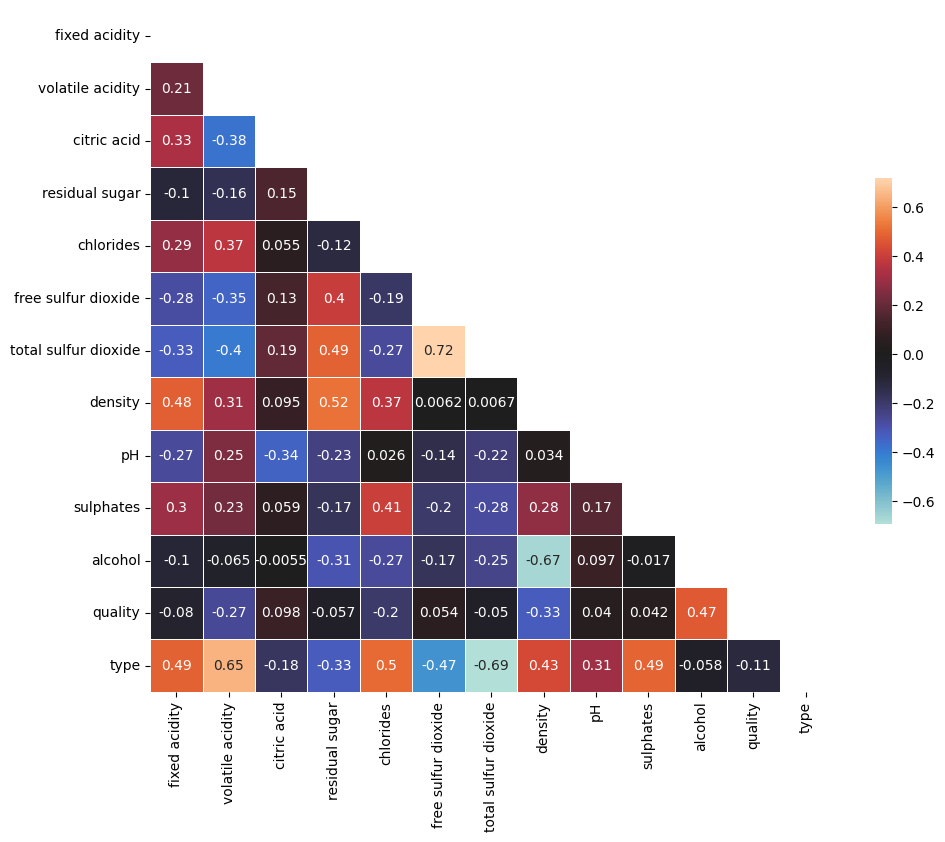

In [ ]:
#Compute the correlation matrix
matrix_corr = combine_data.corr()

#Generate a mask foor the upper triangle
mask = np.zeros_like(matrix_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize = (11,9))

sns.heatmap(matrix_corr,annot = True,mask = mask,center = 0,
            square = True,linewidths=.5,cbar_kws={"shrink" : .5})

In [ ]:
combine_data.groupby(['type']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
0,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
1,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252


# **Scaling and Spliting**

In [ ]:
#Specify the data
x = combine_data.iloc[:,0:12]
y = np.ravel(combine_data.type)

In [ ]:
#Split the data in to train and test dataset
#Train size = 80%
#Test size  = 20%
#Random state = 8
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3404, 12)
(1064, 12)
(3404,)
(1064,)


In [ ]:
from sklearn.preprocessing import StandardScaler
#Scaling the continuous variable
scaler = StandardScaler().fit(x_train)

#Scale the train set
x_train = scaler.transform(x_train)

#Scale the test set
x_test = scaler.transform(x_test)

x_val = scaler.transform(x_val)

#scaler = StandardScaler().fit(combine_data)
#combine_data = scaler.transform(combine_data)

# **Create a Neural Network Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn import metrics

In [ ]:
architectures = [
    #Model 1 - underfitting
    Sequential([
        Dense(1, activation='sigmoid', input_shape=(12,)),
    ]),

    #Model 2 - Relu (1 Hidden Layer)
    Sequential([
        Dense(4, activation='relu', input_shape=(12,)),
        Dense(1, activation='sigmoid'),
    ]),

    #Model 3 - Relu (2 Hidden Layer)
    Sequential([
        Dense(32, activation='relu', input_shape=(12,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),

    # Model 4 - Hyperbolic Tangent (tanh)
    Sequential([
        Dense(64, activation='relu', input_shape=(12,)),
        Dense(32, activation='tanh'),
        Dense(1, activation='sigmoid'),
    ]),

    #Model 5
    Sequential([
        Dense(128,activation='relu',input_shape=(12,)),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
]

Architecture 1:

Epoch 1/50
107/107 [==============================] - 2s 9ms/step - loss: 1.0803 - accuracy: 0.3608 - val_loss: 0.9538 - val_accuracy: 0.4167
Epoch 2/50
107/107 [==============================] - 1s 11ms/step - loss: 0.8275 - accuracy: 0.5038 - val_loss: 0.7318 - val_accuracy: 0.5939
Epoch 3/50
107/107 [==============================] - 2s 17ms/step - loss: 0.6388 - accuracy: 0.6625 - val_loss: 0.5729 - val_accuracy: 0.7406
Epoch 4/50
107/107 [==============================] - 1s 9ms/step - loss: 0.5040 - accuracy: 0.8073 - val_loss: 0.4601 - val_accuracy: 0.8509
Epoch 5/50
107/107 [==============================] - 1s 5ms/step - loss: 0.4094 - accuracy: 0.8863 - val_loss: 0.3804 - val_accuracy: 0.8955
Epoch 6/50
107/107 [==============================] - 1s 7ms/step - loss: 0.3426 - accuracy: 0.9292 - val_loss: 0.3234 - val_accuracy: 0.9178
Epoch 7/50
107/107 [==============================] - 0s 4ms/step - loss: 0.2942 - accuracy: 0.9471 - val_loss: 0.2815 - val_accu

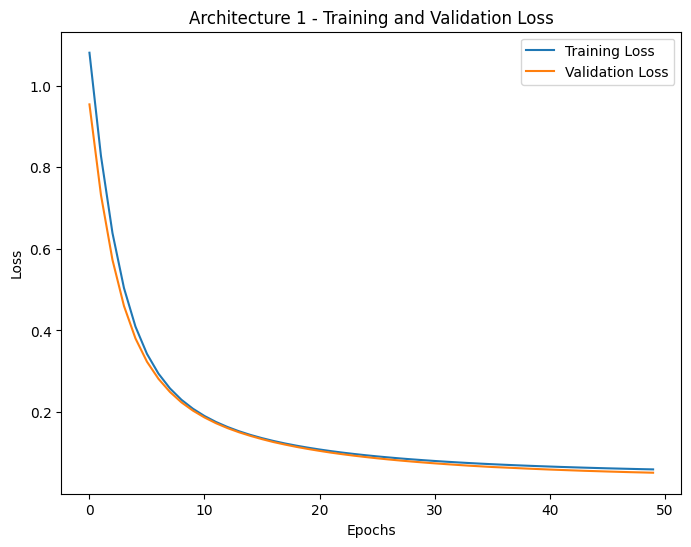

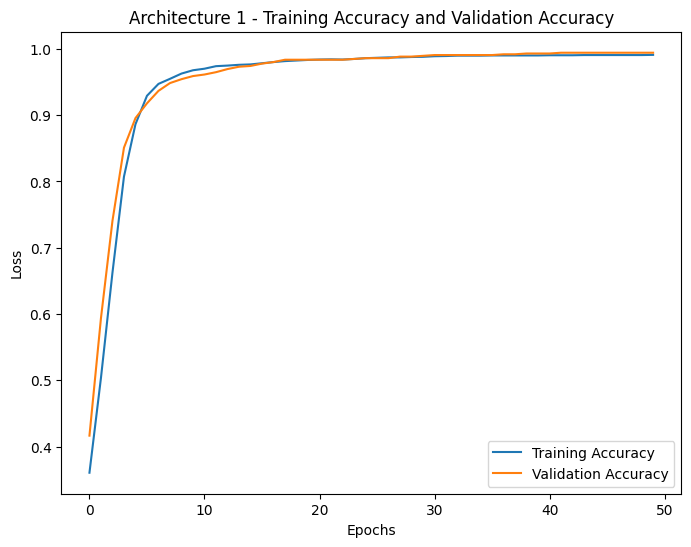

Architecture 2:

Epoch 1/50
107/107 [==============================] - 1s 5ms/step - loss: 0.9379 - accuracy: 0.4354 - val_loss: 0.7426 - val_accuracy: 0.5528
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.6710 - val_loss: 0.5148 - val_accuracy: 0.7887
Epoch 3/50
107/107 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.8355 - val_loss: 0.3776 - val_accuracy: 0.8862
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.9104 - val_loss: 0.2893 - val_accuracy: 0.9354
Epoch 5/50
107/107 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9424 - val_loss: 0.2302 - val_accuracy: 0.9566
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9580 - val_loss: 0.1887 - val_accuracy: 0.9648
Epoch 7/50
107/107 [==============================] - 0s 3ms/step - loss: 0.1767 - accuracy: 0.9671 - val_loss: 0.1592 - val_accura

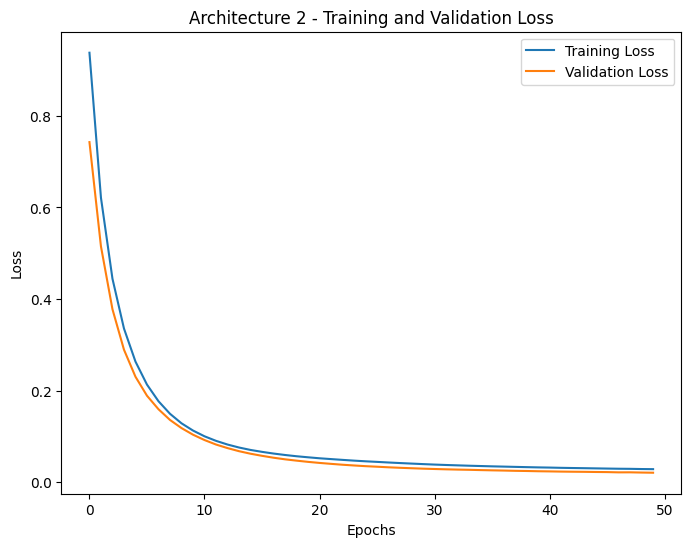

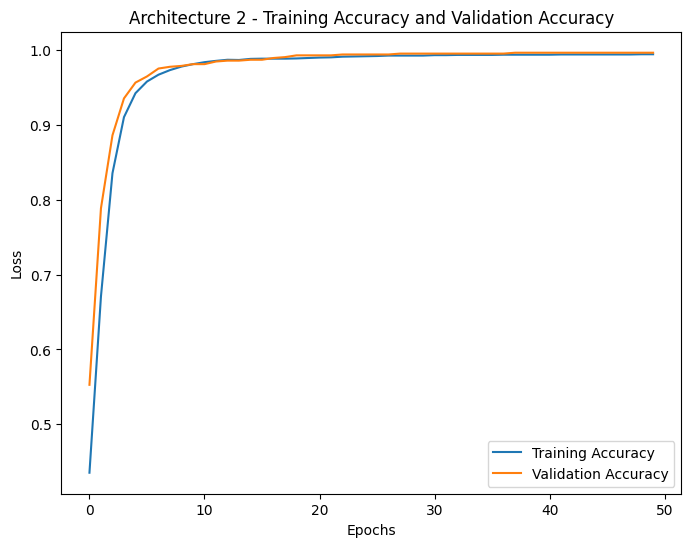

Architecture 3:

Epoch 1/50
107/107 [==============================] - 1s 4ms/step - loss: 0.3525 - accuracy: 0.9198 - val_loss: 0.1209 - val_accuracy: 0.9883
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9882 - val_loss: 0.0446 - val_accuracy: 0.9906
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9921 - val_loss: 0.0312 - val_accuracy: 0.9918
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9932 - val_loss: 0.0257 - val_accuracy: 0.9953
Epoch 5/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9932 - val_loss: 0.0227 - val_accuracy: 0.9953
Epoch 6/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9947 - val_loss: 0.0209 - val_accuracy: 0.9965
Epoch 7/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9947 - val_loss: 0.0193 - val_accura

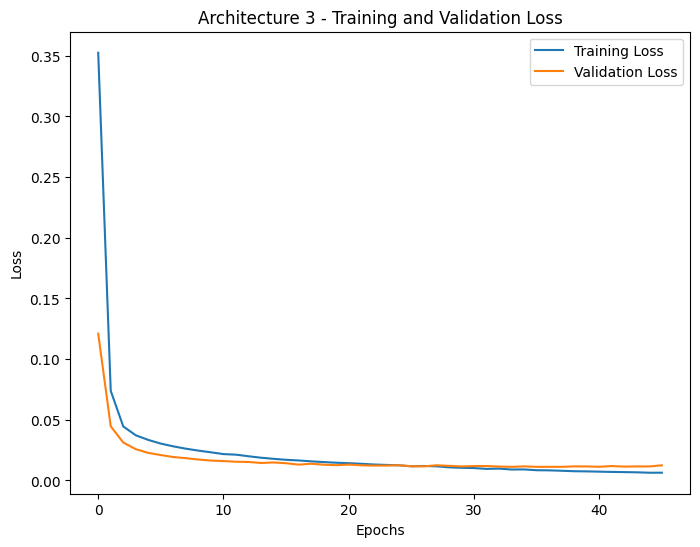

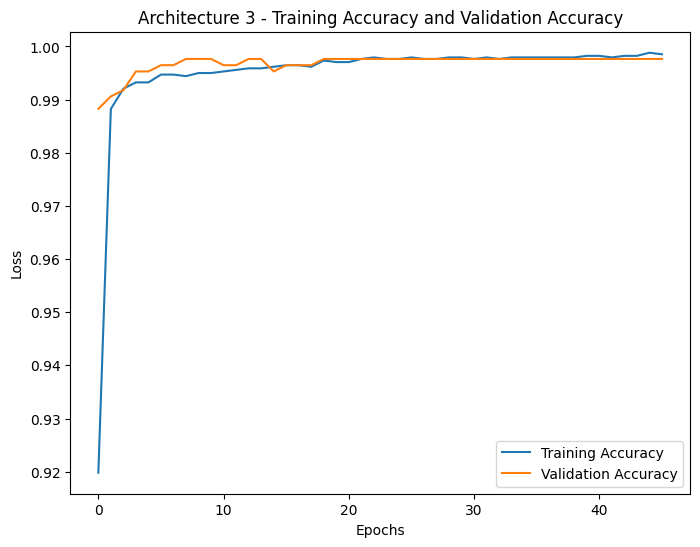

Architecture 4:

Epoch 1/50
107/107 [==============================] - 2s 4ms/step - loss: 0.1708 - accuracy: 0.9712 - val_loss: 0.0550 - val_accuracy: 0.9894
Epoch 2/50
107/107 [==============================] - 1s 5ms/step - loss: 0.0448 - accuracy: 0.9924 - val_loss: 0.0326 - val_accuracy: 0.9906
Epoch 3/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0365 - accuracy: 0.9927 - val_loss: 0.0267 - val_accuracy: 0.9965
Epoch 4/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0322 - accuracy: 0.9941 - val_loss: 0.0254 - val_accuracy: 0.9953
Epoch 5/50
107/107 [==============================] - 1s 5ms/step - loss: 0.0295 - accuracy: 0.9944 - val_loss: 0.0204 - val_accuracy: 0.9977
Epoch 6/50
107/107 [==============================] - 1s 7ms/step - loss: 0.0269 - accuracy: 0.9950 - val_loss: 0.0195 - val_accuracy: 0.9977
Epoch 7/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0249 - accuracy: 0.9947 - val_loss: 0.0197 - val_accura

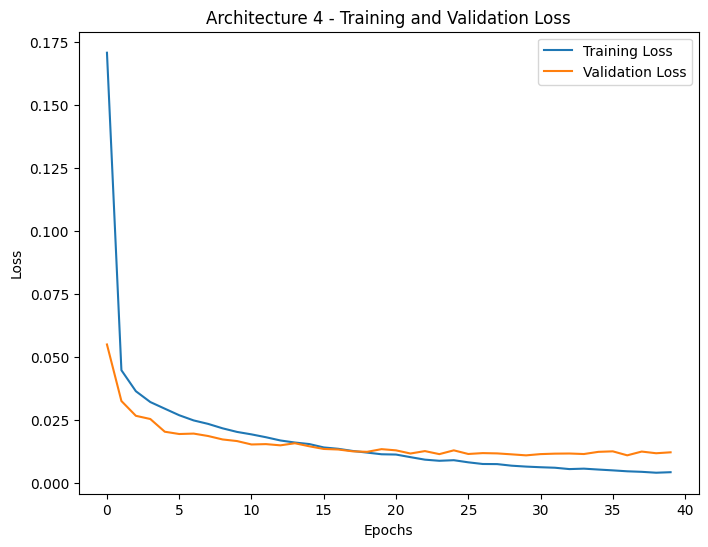

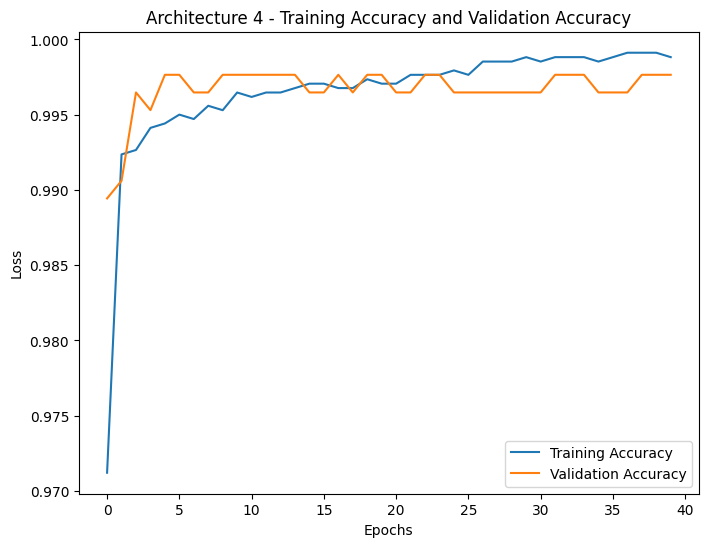

Architecture 5:

Epoch 1/50
107/107 [==============================] - 2s 5ms/step - loss: 0.1600 - accuracy: 0.9733 - val_loss: 0.0321 - val_accuracy: 0.9941
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9938 - val_loss: 0.0223 - val_accuracy: 0.9953
Epoch 3/50
107/107 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9944 - val_loss: 0.0206 - val_accuracy: 0.9953
Epoch 4/50
107/107 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9944 - val_loss: 0.0164 - val_accuracy: 0.9965
Epoch 5/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0256 - accuracy: 0.9953 - val_loss: 0.0142 - val_accuracy: 0.9965
Epoch 6/50
107/107 [==============================] - 1s 6ms/step - loss: 0.0224 - accuracy: 0.9959 - val_loss: 0.0129 - val_accuracy: 0.9965
Epoch 7/50
107/107 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9965 - val_loss: 0.0126 - val_accura

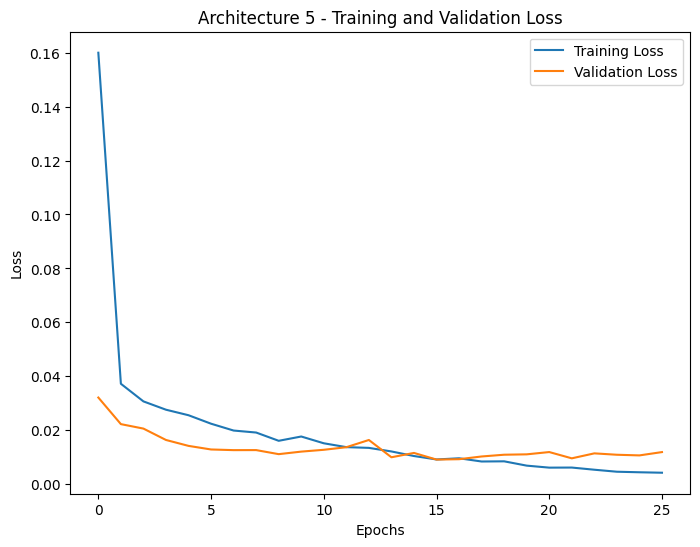

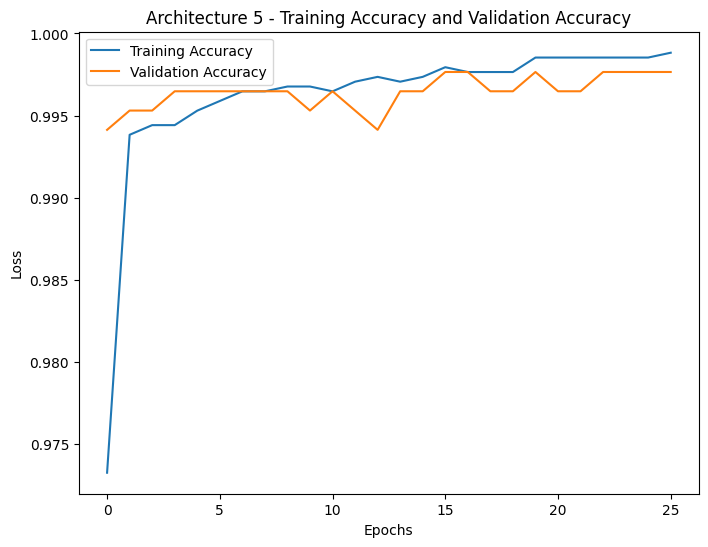

In [ ]:
#Define the hyperparameters
learning_rate = 0.001
batch_size = 32

#Array to store history later
histories=[]

#Iteration (for loop)
for i, model in enumerate(architectures):

    #Complie the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    print(f"Architecture {i+1}:")
    print()

    #Train and evaluate the model
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])
    histories.append(history)

    #To predict the output values of the test data
    y_pred = np.round(model.predict(x_test))
    print()

    #Confusion matrix
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:White', 'true:Red'],
                       columns=['pred:White', 'pred:Red']))
    print()

    #loss value and accuracy of the model on the test dataset
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print('Test dataset -> Test Accuracy: %.3f' % acc,  'Loss value: %.3f' % loss)

    #loss value and accuracy of the model on the train dataset
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    print('Train dataset -> Test Accuracy: %.3f' % acc,  'Loss value: %.3f' % loss)
    print()

    #Classification report
    print(classification_report(y_test, y_pred))
    print()

    #Plot the training and validation loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Architecture {i+1} - Training and Validation Loss')
    plt.legend()
    plt.show()


    #Plot the training and validation loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Architecture {i+1} - Training Accuracy and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
for i, history in enumerate(histories):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print(f"Architecture {i+1}:")
    print(f"Final Training Loss: {train_loss[-1]}")
    print(f"Final Validation Loss: {val_loss[-1]}")
    print(f"Final Training Accuracy: {train_acc[-1]}")
    print(f"Final Validation Accuracy: {val_acc[-1]}\n")

Architecture 1:
Final Training Loss: 0.05962064862251282
Final Validation Loss: 0.05145849660038948
Final Training Accuracy: 0.9908930659294128
Final Validation Accuracy: 0.9941314458847046

Architecture 2:
Final Training Loss: 0.028323164209723473
Final Validation Loss: 0.020534086972475052
Final Training Accuracy: 0.9944183230400085
Final Validation Accuracy: 0.9964788556098938

Architecture 3:
Final Training Loss: 0.0063357166945934296
Final Validation Loss: 0.012406892143189907
Final Training Accuracy: 0.9985311627388
Final Validation Accuracy: 0.9976525902748108

Architecture 4:
Final Training Loss: 0.004331553354859352
Final Validation Loss: 0.012225950136780739
Final Training Accuracy: 0.9988248944282532
Final Validation Accuracy: 0.9976525902748108

Architecture 5:
Final Training Loss: 0.0042605833150446415
Final Validation Loss: 0.011910627596080303
Final Training Accuracy: 0.9988248944282532
Final Validation Accuracy: 0.9976525902748108



# **Model Visualization**
-Model above have different activation function,but they are sharing the **same**
**Learning rate :** 0.001

**1)Batch size :**32

**2)Epoch :**50

**3)Optimizer :**Adam

-The **differences** between the architecture are

**1)Activation function :** sigmoid,relu,tanh

**2)Number of hidden layer**

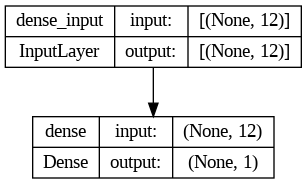

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(architectures[0], to_file=f'model_plot_{i+1}.png', show_shapes=True, show_layer_names=True)

Architecture 1

Final Training Loss: 0.05962064862251282

Final Validation Loss: 0.05145849660038948

Final Training Accuracy: 0.9908930659294128

Final Validation Accuracy: 0.9941314458847046

-The accuracy of this model is **excellent** and accord to the train and validation curve above, this model can be consider **performing well**

-However,this model does not contain any hidden layer and considered as **underfitting**. Meanwhile,**relu** activation function is used in this model


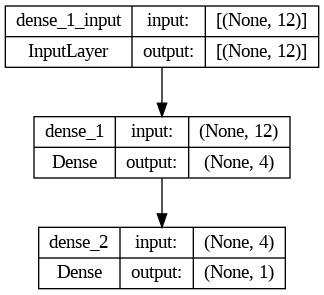

In [ ]:
plot_model(architectures[1], to_file=f'model_plot_{i+1}.png', show_shapes=True, show_layer_names=True)

Architecture 2:

Final Training Loss: 0.028323164209723473

Final Validation Loss: 0.020534086972475052

Final Training Accuracy: 0.9944183230400085

Final Validation Accuracy: 0.9964788556098938

-The accuracy of the model is **excellent** and accord to the train and validation curve above, this model **peform very well**

-This model consists **one hidden layer** with **4 nodes** and the activition function used is **relu**. The number of hidden layers and activation are well suited to the model.

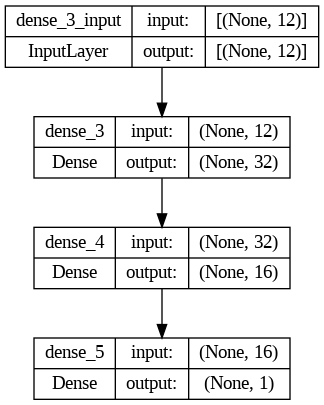

In [ ]:
plot_model(architectures[2], to_file=f'model_plot_{i+1}.png', show_shapes=True, show_layer_names=True)

Architecture 3

Final Training Loss: 0.0063357166945934296

Final Validation Loss: 0.012406892143189907

Final Training Accuracy: 0.9985311627388

Final Validation Accuracy: 0.9976525902748108

- The accuracy of this model is **excellent**.However, according to the train and validation curve above,the accuracy curve and validation curve are a bit uneven and jagged and is considered as **slightly overfitting**

-This situation occurs might due to the **higher number of hidden layers**, as first hidden layer contains **32 nodes** and second layers contains **16 nodes**.

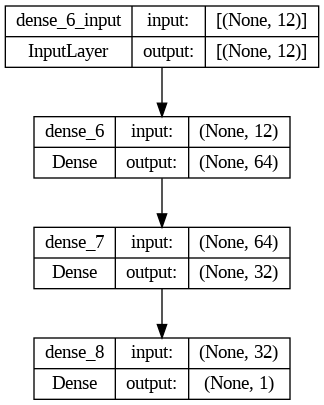

In [ ]:
plot_model(architectures[3], to_file=f'model_plot_{i+1}.png', show_shapes=True, show_layer_names=True)

Architecture 4

Final Training Loss: 0.004331553354859352

Final Validation Loss: 0.012225950136780739

Final Training Accuracy: 0.9988248944282532

Final Validation Accuracy: 0.9976525902748108

-The accuracy of this model is **excellence**. However, based on the train and validation curve above,the train curve and validation curve are **uneven and jagged**.This, this model is considered as **overfitting**

-This happens might due to the **high complexity** of the model as this model contains **2 hidden layers** that first layer contains **64 nodes** and second layers consists **32 nodes**.

-Besides that,**Hyperbolic tangent (tanh)** activation function is used has **increased the complexity** as this dataset can be considered as simple dataset.

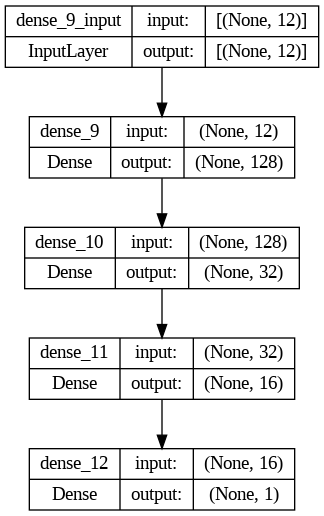

In [ ]:
plot_model(architectures[4], to_file=f'model_plot_{i+1}.png', show_shapes=True, show_layer_names=True)

Architecture 5:

Final Training Loss: 0.0042605833150446415

Final Validation Loss: 0.011910627596080303

Final Training Accuracy: 0.9988248944282532

Final Validation Accuracy: 0.9976525902748108


-The accuracy of this model is **excellent**, However, according to the  the train and validation curve above,the training accuracy, **overfitting** is found in this model as the train curve and validation curve of this model are **highly uneven and jagged**.

-This happens due to the **high complexity** of this model as this model consists **three hidden layers**. First hidden layers contains **128 nodes**, second hidden layer contains **32 nodes** and third hidden layer contains **16 nodes**.Although relu activation function is used and suit well with this model. But the **high number of hidden layers** has **elevated the complexity** of this model.


# **Model Tunning**



In [ ]:
#Define the hyperparameter for tunning
learning_rate = [0.01,0.1,1]
activation_function = ['sigmoid','relu']
batchsize = [32,64,128]
epochs = 50

#Create a table to store the results
table = pd.DataFrame(columns=['Learning rate','Batch size','Activation function','Optimizer','Validation accuracy'])

In [ ]:
#Perform the hyperparameter tunning
for l in learning_rate:
  for bs in batchsize:
    for activation in activation_function:
      #Clear previous model and create a new model
      tf.keras.backend.clear_session()
      #Create architecture 2 the best model among the five models above
      model = Sequential()
      model.add(Dense(4,input_shape=(12,),activation='relu'))
      model.add(Dense(1,activation=activation))

      #Compile the model
      optimizer = tf.keras.optimizers.Adam(learning_rate = l)
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

      #Train the best model
      early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
      history = model.fit(x_train, y_train, epochs=epochs, batch_size=bs, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=0)

      # Evaluate the model on the validation set
      val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)

      # Store the results in the table
      table = table.append({'Learning Rate': l, 'Batch Size': bs, 'Activation Function': activation, 'Optimizer': 'adam', 'Validation Accuracy': val_accuracy}, ignore_index=True)

#Print table
table.sort_values('Validation accuracy')


,Learning rate,Batch size,Activation function,Optimizer,Validation accuracy,Learning Rate,Batch Size,Activation Function,Validation Accuracy
0,NaN,NaN,NaN,adam,NaN,0.01,32.0,sigmoid,0.997180
1,NaN,NaN,NaN,adam,NaN,0.01,32.0,relu,0.997180
2,NaN,NaN,NaN,adam,NaN,0.01,64.0,sigmoid,0.996241
3,NaN,NaN,NaN,adam,NaN,0.01,64.0,relu,0.998120
4,NaN,NaN,NaN,adam,NaN,0.01,128.0,sigmoid,0.998120
5,NaN,NaN,NaN,adam,NaN,0.01,128.0,relu,0.989662
6,NaN,NaN,NaN,adam,NaN,0.10,32.0,sigmoid,0.998120
7,NaN,NaN,NaN,adam,NaN,0.10,32.0,relu,0.993421
8,NaN,NaN,NaN,adam,NaN,0.10,64.0,sigmoid,0.997180
9,NaN,NaN,NaN,adam,NaN,0.10,64.0,relu,0.990601


# **Model Evaluation**

Based on the table above, the highest accuracy is around **0.997180**

The hyperparameter of the highest accuracy model are

**Learning rate :** 0.01

**Activtion function :** sigmoid

**Batch size :** 32

**Optimizer :** Adam

In [ ]:
#Best hyperparameter
best_batch_size = 32
best_optimizer = 'Adam'
best_learning_rate = 0.01
best_activation_function = 'sigmoid'

mymodel = Sequential()
mymodel.add(Dense(4, activation='relu', input_shape=(12,))),
mymodel.add(Dense(1, activation=best_activation_function))

#Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = best_learning_rate)
mymodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the best model
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
mymodel.fit(x_train, y_train, epochs=50, batch_size=best_batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=0)

# Evaluate the best model on the validation and testing data
val_loss, val_accuracy = mymodel.evaluate(x_val, y_val, verbose=0)
test_loss, test_accuracy = mymodel.evaluate(x_test, y_test, verbose=0)

# Print the validation and testing results
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

print()

#Classification report
print(classification_report(y_test, y_pred))

print()

#Confusion matrix
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1])))
print()

Validation Accuracy: 0.9976525902748108
Testing Accuracy: 0.9981203079223633

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       775
           1       1.00      0.99      0.99       289

    accuracy                           1.00      1064
   macro avg       1.00      1.00      1.00      1064
weighted avg       1.00      1.00      1.00      1064


     0    1
0  774    1
1    2  287

